# Home LLC Assessment

In [1]:
#Importing the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as pex
aimport plotly.graph_objects as pltg
from plotly.offline import init_notebook_mode, iplot
import plotly

# Data Collection

In [251]:
# Reading CASE-SHILLER Index into a dataframe
df_CS = pd.read_csv("CSUSHPISA.csv")

# Changing dtype of date column
df_CS["DATE"] = pd.to_datetime(df_CS["DATE"])



In [252]:
# Selecting data till JULY 2023
mask = df_CS["DATE"]>= "2000-01-01"
df_CS = df_CS[mask]

#Resetting Index
df_CS.reset_index(inplace = True)
df_CS.drop(columns = ["index"], inplace = True)

# Creating "Year" and "Month" columns
df_CS["Year"] = pd.DatetimeIndex(df_CS["DATE"]).year
df_CS["Month"] = pd.DatetimeIndex(df_CS["DATE"]).month
print("Shape of the CASE-SHILLER Index:- ", df_CS.shape)
df_CS.tail()

Shape of the CASE-SHILLER Index:-  (285, 4)


DATE  CSUSHPISA  Year  Month
280 2023-05-01    302.566  2023      5
281 2023-06-01    304.593  2023      6
282 2023-07-01    306.767  2023      7
283 2023-08-01    309.155  2023      8
284 2023-09-01    311.175  2023      9

In [253]:
# Reading Unemployment Rate Data into a dataframe
df_unemp = pd.read_csv("UNRATE.csv")
#df_unemp.drop([259], inplace = True)
mask = df_unemp["DATE"]>= "2000-01-01"
df_unemp= df_unemp[mask]
print("Unemployment Rate Data:- ", df_unemp.shape)
df_unemp

Unemployment Rate Data:-  (287, 2)


DATE  UNRATE
624  2000-01-01     4.0
625  2000-02-01     4.1
626  2000-03-01     4.0
627  2000-04-01     3.8
628  2000-05-01     4.0
..          ...     ...
906  2023-07-01     3.5
907  2023-08-01     3.8
908  2023-09-01     3.8
909  2023-10-01     3.9
910  2023-11-01     3.7

[287 rows x 2 columns]

In [254]:
# Reading Employment Rate Data into a dataframe
df_emp = pd.read_csv("employment_rate.csv")
df_emp = df_emp.rename(columns={'LREM64TTUSM156S': 'EmpRate'})
#df_emp.drop([259], inplace = True)
mask = df_emp["DATE"]>= "2000-01-01"
df_emp= df_emp[mask]
print("shape of the Employment Rate Data:- ", df_emp.shape)
df_emp

shape of the Employment Rate Data:-  (286, 2)


DATE    EmpRate
276  2000-01-01  74.264657
277  2000-02-01  74.283062
278  2000-03-01  74.242355
279  2000-04-01  74.508811
280  2000-05-01  74.079356
..          ...        ...
557  2023-06-01  71.993242
558  2023-07-01  71.953523
559  2023-08-01  72.055470
560  2023-09-01  72.054079
561  2023-10-01  71.979163

[286 rows x 2 columns]

In [255]:
# Reading Per Capita GDP Data into a dataframe
df_pcgdp = pd.read_csv("per_capita_gdp.csv", names = ["DATE", "A939RX0Q048SBEA"], skiprows = 1)
df_pcgdp = df_pcgdp.rename(columns={'A939RX0Q048SBEA': 'Per_Capita_GDP'})
print("Shape of the Per Capita GDP Data:- ", df_pcgdp.shape)
mask = df_pcgdp["DATE"]>= "2000-01-01"
df_pcgdp= df_pcgdp[mask]
df_pcgdp

Shape of the Per Capita GDP Data:-  (307, 2)


DATE  Per_Capita_GDP
212  2000-01-01         49335.0
213  2000-04-01         50109.0
214  2000-07-01         50024.0
215  2000-10-01         50190.0
216  2001-01-01         49911.0
..          ...             ...
302  2022-07-01         65462.0
303  2022-10-01         65783.0
304  2023-01-01         66078.0
305  2023-04-01         66341.0
306  2023-07-01         67083.0

[95 rows x 2 columns]

In [256]:
# Interest Rate Data
df_Fed_rate = pd.read_csv("FEDFUNDS (2).csv")
mask = df_Fed_rate["DATE"]>= "2000-01-01"
df_Fed_rate= df_Fed_rate[mask]
print("Shape of the Interest rate data:- ",df_Fed_rate.shape)
df_Fed_rate

Shape of the Interest rate data:-  (287, 2)


DATE  FEDFUNDS
546  2000-01-01      5.45
547  2000-02-01      5.73
548  2000-03-01      5.85
549  2000-04-01      6.02
550  2000-05-01      6.27
..          ...       ...
828  2023-07-01      5.12
829  2023-08-01      5.33
830  2023-09-01      5.33
831  2023-10-01      5.33
832  2023-11-01      5.33

[287 rows x 2 columns]

In [257]:
# Construction Price Index
df_CPI = pd.read_csv("construction_price_index.csv", names = ["DATE", "CPIAUCSL"], skiprows = 1)
df_CPI = df_CPI.rename(columns={'CPIAUCSL': 'CPI'})
mask = df_CPI["DATE"]>= "2000-01-01"
df_CPI= df_CPI[mask]
print("Shape of the Construction Price Index:- ", df_CPI.shape)
df_CPI

Shape of the Construction Price Index:-  (286, 2)


DATE      CPI
636  2000-01-01  144.100
637  2000-02-01  144.700
638  2000-03-01  145.400
639  2000-04-01  145.600
640  2000-05-01  144.900
..          ...      ...
917  2023-06-01  337.336
918  2023-07-01  334.576
919  2023-08-01  333.980
920  2023-09-01  332.224
921  2023-10-01  329.690

[286 rows x 2 columns]

In [258]:
# Working Age Population data
df_work_pop=pd.read_csv("working_population.csv", names = ["DATE", "LFWA64TTUSM647S"], skiprows = 1)
df_work_pop=df_work_pop.rename(columns={'LFWA64TTUSM647S': 'Working_Age_Population'})
mask = df_work_pop["DATE"]>= "2000-01-01"
df_work_pop= df_work_pop[mask]
print("Shape of the Working Population :- ", df_work_pop.shape)
df_work_pop

Shape of the Working Population :-  (286, 2)


DATE  Working_Age_Population
276  2000-01-01            1.782921e+08
277  2000-02-01            1.783433e+08
278  2000-03-01            1.784055e+08
279  2000-04-01            1.785807e+08
280  2000-05-01            1.787272e+08
..          ...                     ...
557  2023-06-01            2.087069e+08
558  2023-07-01            2.087792e+08
559  2023-08-01            2.089066e+08
560  2023-09-01            2.091172e+08
561  2023-10-01            2.090394e+08

[286 rows x 2 columns]

In [259]:
# Income data
df_income=pd.read_csv("Income.csv", names = ["DATE", "DSPIC96"], skiprows = 1)
df_income=df_income.rename(columns={'DSPIC96': 'Income'})
mask = df_income["DATE"]>= "2000-01-01"
df_income= df_income[mask]
print("Shape of the Working Population :- ", df_income.shape)
df_income

Shape of the Working Population :-  (286, 2)


DATE   Income
492  2000-01-01   9799.9
493  2000-02-01   9837.9
494  2000-03-01   9864.0
495  2000-04-01   9913.7
496  2000-05-01   9954.5
..          ...      ...
773  2023-06-01  16809.5
774  2023-07-01  16796.9
775  2023-08-01  16799.7
776  2023-09-01  16804.8
777  2023-10-01  16848.7

[286 rows x 2 columns]

In [260]:
# New constructed units
df_new_constructed_units=pd.read_csv("new_constructed_units.csv", names = ["DATE", "COMPUTSA"], skiprows = 1)
df_new_constructed_units=df_new_constructed_units.rename(columns={'COMPUTSA': 'New constructed units'})
mask = df_new_constructed_units["DATE"]>= "2000-01-01"
df_new_constructed_units= df_new_constructed_units[mask]
print("Shape of new_constructed_units :- ", df_new_constructed_units.shape)
df_new_constructed_units

Shape of new_constructed_units :-  (286, 2)


DATE  New constructed units
384  2000-01-01                 1574.0
385  2000-02-01                 1677.0
386  2000-03-01                 1704.0
387  2000-04-01                 1610.0
388  2000-05-01                 1682.0
..          ...                    ...
665  2023-06-01                 1492.0
666  2023-07-01                 1334.0
667  2023-08-01                 1370.0
668  2023-09-01                 1478.0
669  2023-10-01                 1410.0

[286 rows x 2 columns]

# Data Preparation

In [261]:
 # Merging Per Capita GDP (Quarterly data)
df_pcgdp["DATE"] = pd.to_datetime(df_pcgdp["DATE"])
df_CS = pd.merge(df_CS,df_pcgdp,how = "left")
df_CS.head()

DATE  CSUSHPISA  Year  Month  Per_Capita_GDP
0 2000-01-01    100.551  2000      1         49335.0
1 2000-02-01    101.339  2000      2             NaN
2 2000-03-01    102.127  2000      3             NaN
3 2000-04-01    102.922  2000      4         50109.0
4 2000-05-01    103.678  2000      5             NaN

In [262]:
# Concating dataframes having monthly data to create one dataframe
df = pd.DataFrame()
df_bymonth = [df_CS, df_work_pop, df_CPI, df_unemp, df_emp, df_Fed_rate,df_income,df_new_constructed_units]
for df1 in df_bymonth:
    df1["DATE"] = pd.to_datetime(df1["DATE"])
    df1 = df1.set_index("DATE")
    df = pd.concat([df,df1], axis = 1)
print(df.shape)
df.head()

(287, 11)


CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                           
2000-01-01    100.551  2000.0    1.0         49335.0            1.782921e+08   
2000-02-01    101.339  2000.0    2.0             NaN            1.783433e+08   
2000-03-01    102.127  2000.0    3.0             NaN            1.784055e+08   
2000-04-01    102.922  2000.0    4.0         50109.0            1.785807e+08   
2000-05-01    103.678  2000.0    5.0             NaN            1.787272e+08   

              CPI  UNRATE    EmpRate  FEDFUNDS  Income  New constructed units  
DATE                                                                           
2000-01-01  144.1     4.0  74.264657      5.45  9799.9                 1574.0  
2000-02-01  144.7     4.1  74.283062      5.73  9837.9                 1677.0  
2000-03-01  145.4     4.0  74.242355      5.85  9864.0                 1704.0  
2000-04-01  145.6     3.8  74.508811      6.02  9913.7                 1610.0  
2000-05-01  144.9     4.0  74.079356      6.27  9954.5                 1682.0

In [263]:
df.shape

(287, 11)

In [264]:
#Checking for null values

df.isnull().sum()

CSUSHPISA                   2
Year                        2
Month                       2
Per_Capita_GDP            192
Working_Age_Population      1
CPI                         1
UNRATE                      0
EmpRate                     1
FEDFUNDS                    0
Income                      1
New constructed units       1
dtype: int64

In [265]:
# Filling missing values in the Per_Capita_GDP column using linear interpolation
df["Per_Capita_GDP"] = df["Per_Capita_GDP"].interpolate()


In [266]:
df

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                           
2000-01-01    100.551  2000.0    1.0    49335.000000            1.782921e+08   
2000-02-01    101.339  2000.0    2.0    49593.000000            1.783433e+08   
2000-03-01    102.127  2000.0    3.0    49851.000000            1.784055e+08   
2000-04-01    102.922  2000.0    4.0    50109.000000            1.785807e+08   
2000-05-01    103.678  2000.0    5.0    50080.666667            1.787272e+08   
...               ...     ...    ...             ...                     ...   
2023-07-01    306.767  2023.0    7.0    67083.000000            2.087792e+08   
2023-08-01    309.155  2023.0    8.0    67083.000000            2.089066e+08   
2023-09-01    311.175  2023.0    9.0    67083.000000            2.091172e+08   
2023-10-01        NaN     NaN    NaN    67083.000000            2.090394e+08   
2023-11-01        NaN     NaN    NaN    67083.000000                     NaN   

                CPI  UNRATE    EmpRate  FEDFUNDS   Income  \
DATE                                                        
2000-01-01  144.100     4.0  74.264657      5.45   9799.9   
2000-02-01  144.700     4.1  74.283062      5.73   9837.9   
2000-03-01  145.400     4.0  74.242355      5.85   9864.0   
2000-04-01  145.600     3.8  74.508811      6.02   9913.7   
2000-05-01  144.900     4.0  74.079356      6.27   9954.5   
...             ...     ...        ...       ...      ...   
2023-07-01  334.576     3.5  71.953523      5.12  16796.9   
2023-08-01  333.980     3.8  72.055470      5.33  16799.7   
2023-09-01  332.224     3.8  72.054079      5.33  16804.8   
2023-10-01  329.690     3.9  71.979163      5.33  16848.7   
2023-11-01      NaN     3.7        NaN      5.33      NaN   

            New constructed units  
DATE                               
2000-01-01                 1574.0  
2000-02-01                 1677.0  
2000-03-01                 1704.0  
2000-04-01                 1610.0  
2000-05-01                 1682.0  
...                           ...  
2023-07-01                 1334.0  
2023-08-01                 1370.0  
2023-09-01                 1478.0  
2023-10-01                 1410.0  
2023-11-01                    NaN  

[287 rows x 11 columns]

In [267]:
df.dropna(inplace = True)

In [268]:

df.isna().sum()

CSUSHPISA                 0
Year                      0
Month                     0
Per_Capita_GDP            0
Working_Age_Population    0
CPI                       0
UNRATE                    0
EmpRate                   0
FEDFUNDS                  0
Income                    0
New constructed units     0
dtype: int64

In [269]:
print("Shape of the dataframe after preprocessing:- ", df.shape)

Shape of the dataframe after preprocessing:-  (285, 11)


In [270]:
df.to_csv("prepared_dataset.csv")

In [271]:
house_price_df = pd.read_csv("prepared_dataset.csv").set_index("DATE")
house_price_df.head()

CSUSHPISA    Year  Month  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                           
2000-01-01    100.551  2000.0    1.0    49335.000000            1.782921e+08   
2000-02-01    101.339  2000.0    2.0    49593.000000            1.783433e+08   
2000-03-01    102.127  2000.0    3.0    49851.000000            1.784055e+08   
2000-04-01    102.922  2000.0    4.0    50109.000000            1.785807e+08   
2000-05-01    103.678  2000.0    5.0    50080.666667            1.787272e+08   

              CPI  UNRATE    EmpRate  FEDFUNDS  Income  New constructed units  
DATE                                                                           
2000-01-01  144.1     4.0  74.264657      5.45  9799.9                 1574.0  
2000-02-01  144.7     4.1  74.283062      5.73  9837.9                 1677.0  
2000-03-01  145.4     4.0  74.242355      5.85  9864.0                 1704.0  
2000-04-01  145.6     3.8  74.508811      6.02  9913.7                 1610.0  
2000-05-01  144.9     4.0  74.079356      6.27  9954.5                 1682.0

# EDA

In [272]:
house_price_df.describe()

CSUSHPISA         Year       Month  Per_Capita_GDP  \
count  285.000000   285.000000  285.000000      285.000000   
mean   176.028579  2011.378947    6.452632    56752.326316   
std     49.669858     6.868758    3.444024     4736.907687   
min    100.551000  2000.000000    1.000000    49335.000000   
25%    142.531000  2005.000000    3.000000    53581.666667   
50%    167.501000  2011.000000    6.000000    55532.333333   
75%    194.804000  2017.000000    9.000000    60099.000000   
max    311.175000  2023.000000   12.000000    67083.000000   

       Working_Age_Population         CPI      UNRATE     EmpRate    FEDFUNDS  \
count            2.850000e+02  285.000000  285.000000  285.000000  285.000000   
mean             1.980569e+08  207.909846    5.786316   70.022156    1.747965   
std              8.642283e+06   52.088827    1.968839    2.275757    1.926210   
min              1.782921e+08  141.700000    3.400000   60.193856    0.050000   
25%              1.921457e+08  173.500000    4.400000   68.155209    0.140000   
50%              2.004183e+08  203.900000    5.300000   70.766997    1.030000   
75%              2.054523e+08  223.900000    6.700000   71.690442    2.500000   
max              2.091172e+08  353.015000   14.700000   74.508811    6.540000   

             Income  New constructed units  
count    285.000000             285.000000  
mean   13193.696140            1259.631579  
std     2094.235576             412.923229  
min     9799.900000             520.000000  
25%    11651.800000             920.000000  
50%    12805.600000            1262.000000  
75%    14748.600000            1574.000000  
max    20422.600000            2245.000000

In [273]:
house_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 285 entries, 2000-01-01 to 2023-09-01
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CSUSHPISA               285 non-null    float64
 1   Year                    285 non-null    float64
 2   Month                   285 non-null    float64
 3   Per_Capita_GDP          285 non-null    float64
 4   Working_Age_Population  285 non-null    float64
 5   CPI                     285 non-null    float64
 6   UNRATE                  285 non-null    float64
 7   EmpRate                 285 non-null    float64
 8   FEDFUNDS                285 non-null    float64
 9   Income                  285 non-null    float64
 10  New constructed units   285 non-null    float64
dtypes: float64(11)
memory usage: 26.7+ KB


#### Correlation Analysis

In [274]:
# Correlation matrix
corr_matrix=house_price_df.corr()
corr_matrix

CSUSHPISA      Year     Month  Per_Capita_GDP  \
CSUSHPISA                1.000000  0.829348  0.014260        0.931783   
Year                     0.829348  1.000000 -0.023352        0.955895   
Month                    0.014260 -0.023352  1.000000        0.026564   
Per_Capita_GDP           0.931783  0.955895  0.026564        1.000000   
Working_Age_Population   0.713962  0.950637  0.029264        0.872725   
CPI                      0.931169  0.909113  0.003181        0.939857   
UNRATE                  -0.361610 -0.096968  0.004188       -0.315697   
EmpRate                  0.016251 -0.378374 -0.019541       -0.140746   
FEDFUNDS                -0.006398 -0.386091 -0.018247       -0.176678   
Income                   0.855430  0.972431  0.002799        0.952330   
New constructed units    0.090936 -0.386821 -0.012703       -0.154662   

                        Working_Age_Population       CPI    UNRATE   EmpRate  \
CSUSHPISA                             0.713962  0.931169 -0.361610  0.016251   
Year                                  0.950637  0.909113 -0.096968 -0.378374   
Month                                 0.029264  0.003181  0.004188 -0.019541   
Per_Capita_GDP                        0.872725  0.939857 -0.315697 -0.140746   
Working_Age_Population                1.000000  0.808705  0.041097 -0.527300   
CPI                                   0.808705  1.000000 -0.200540 -0.183392   
UNRATE                                0.041097 -0.200540  1.000000 -0.838770   
EmpRate                              -0.527300 -0.183392 -0.838770  1.000000   
FEDFUNDS                             -0.478787 -0.200412 -0.569500  0.782732   
Income                                0.890579  0.895616 -0.104357 -0.329228   
New constructed units                -0.527140 -0.217557 -0.577475  0.770060   

                        FEDFUNDS    Income  New constructed units  
CSUSHPISA              -0.006398  0.855430               0.090936  
Year                   -0.386091  0.972431              -0.386821  
Month                  -0.018247  0.002799              -0.012703  
Per_Capita_GDP         -0.176678  0.952330              -0.154662  
Working_Age_Population -0.478787  0.890579              -0.527140  
CPI                    -0.200412  0.895616              -0.217557  
UNRATE                 -0.569500 -0.104357              -0.577475  
EmpRate                 0.782732 -0.329228               0.770060  
FEDFUNDS                1.000000 -0.326304               0.642582  
Income                 -0.326304  1.000000              -0.270274  
New constructed units   0.642582 -0.270274               1.000000

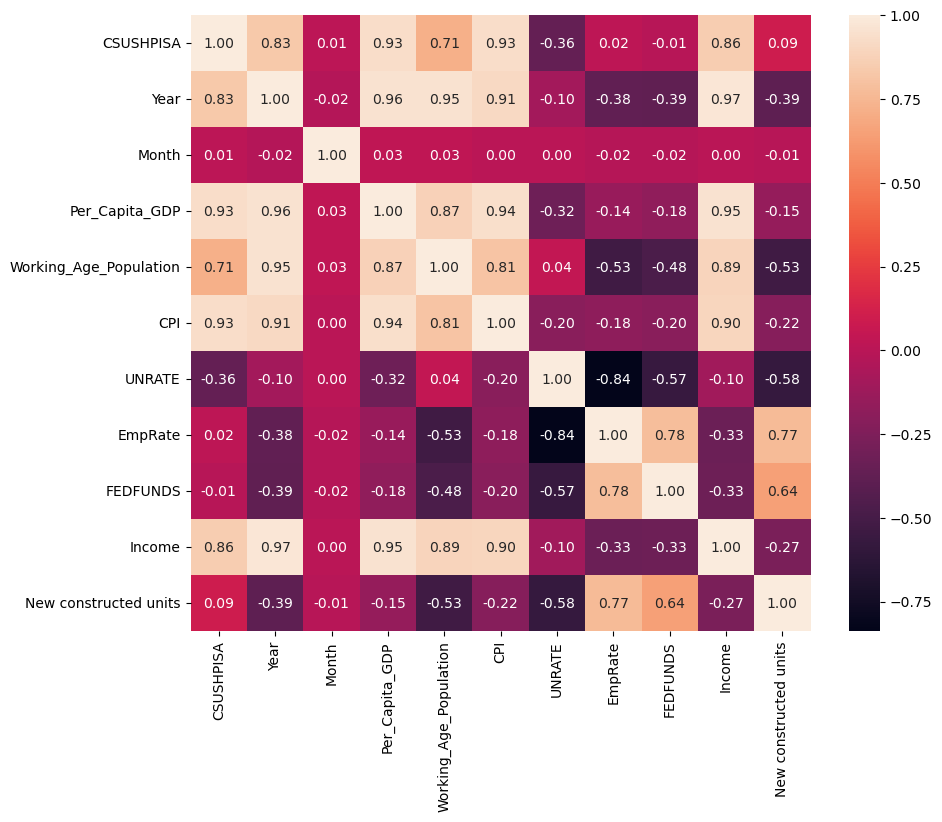

In [276]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f")
plt.show()

### Analysis of Correlation

In [27]:
#Defining a function to plot the columns

def plot_line_chart(df, x, y, title):

  trace_high = pltg.Scatter(
      x = df[x],
      y = df[y],
      name = title,
      line = dict(color = '#0047AB', width=3),
      opacity = 0.8)

  data = [trace_high]


  layout = dict(
      title = title,
      xaxis = dict(
          rangeselector = dict(
              buttons = list([
                  dict(count = 6,
                      label = '6 months',
                      step = 'month',
                      stepmode = 'backward'),
                  dict(count = 1,
                      label = '1 year',
                      step = 'year',
                      stepmode = 'backward'),
                  dict(count = 2,
                      label = '2 years',
                      step = 'year',
                      stepmode = 'backward'),
                  dict(count = 5,
                      label = '5 years',
                      step = 'year',
                      stepmode = 'backward'),
                  dict(count = 10,
                      label = '10 years',
                      step = 'year',
                      stepmode = 'backward'),
                  dict(count = 15,
                      label = '15 years',
                      step = 'year',
                      stepmode = 'backward'),
                  dict(step = 'all')
              ])
          ),
          rangeslider = dict(
              visible = True
          ),
          type = 'date'
      )
  )

  fig = dict(data = data, layout = layout)
  iplot(fig, filename = title)

In [29]:
plot_line_chart(house_price_df, x='Year', y='CSUSHPISA', title='S&P/Case-Shiller U.S. National Home Price Index')

In [30]:
plot_line_chart(house_price_df, x='Year', y='UNRATE', title='USA Unemployment Rate over the years')

In [282]:
plot_line_chart(house_price_df, x='Year', y='Per_Capita_GDP', title='USA GDP (in Billion Dollars) over the years')

In [33]:
plot_line_chart(house_price_df, x='Year', y='Working_Age_Population', title='USA GDP Working Age Population over the years')

In [34]:
plot_line_chart(house_price_df, x='Year', y='FEDFUNDS', title='Federal Funds Effective Rate')


In [35]:
plot_line_chart(house_price_df, x='Year', y='EmpRate', title='Employment Rate')


In [36]:
plot_line_chart(house_price_df, x='Year', y='CPI', title='Construction Price Index')


In [277]:
plot_line_chart(house_price_df, x='Year', y='Income', title='Income')


In [284]:
plot_line_chart(house_price_df, x='Year', y='New constructed units', title='New Constructed Units')


C:\Users\vaish\anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



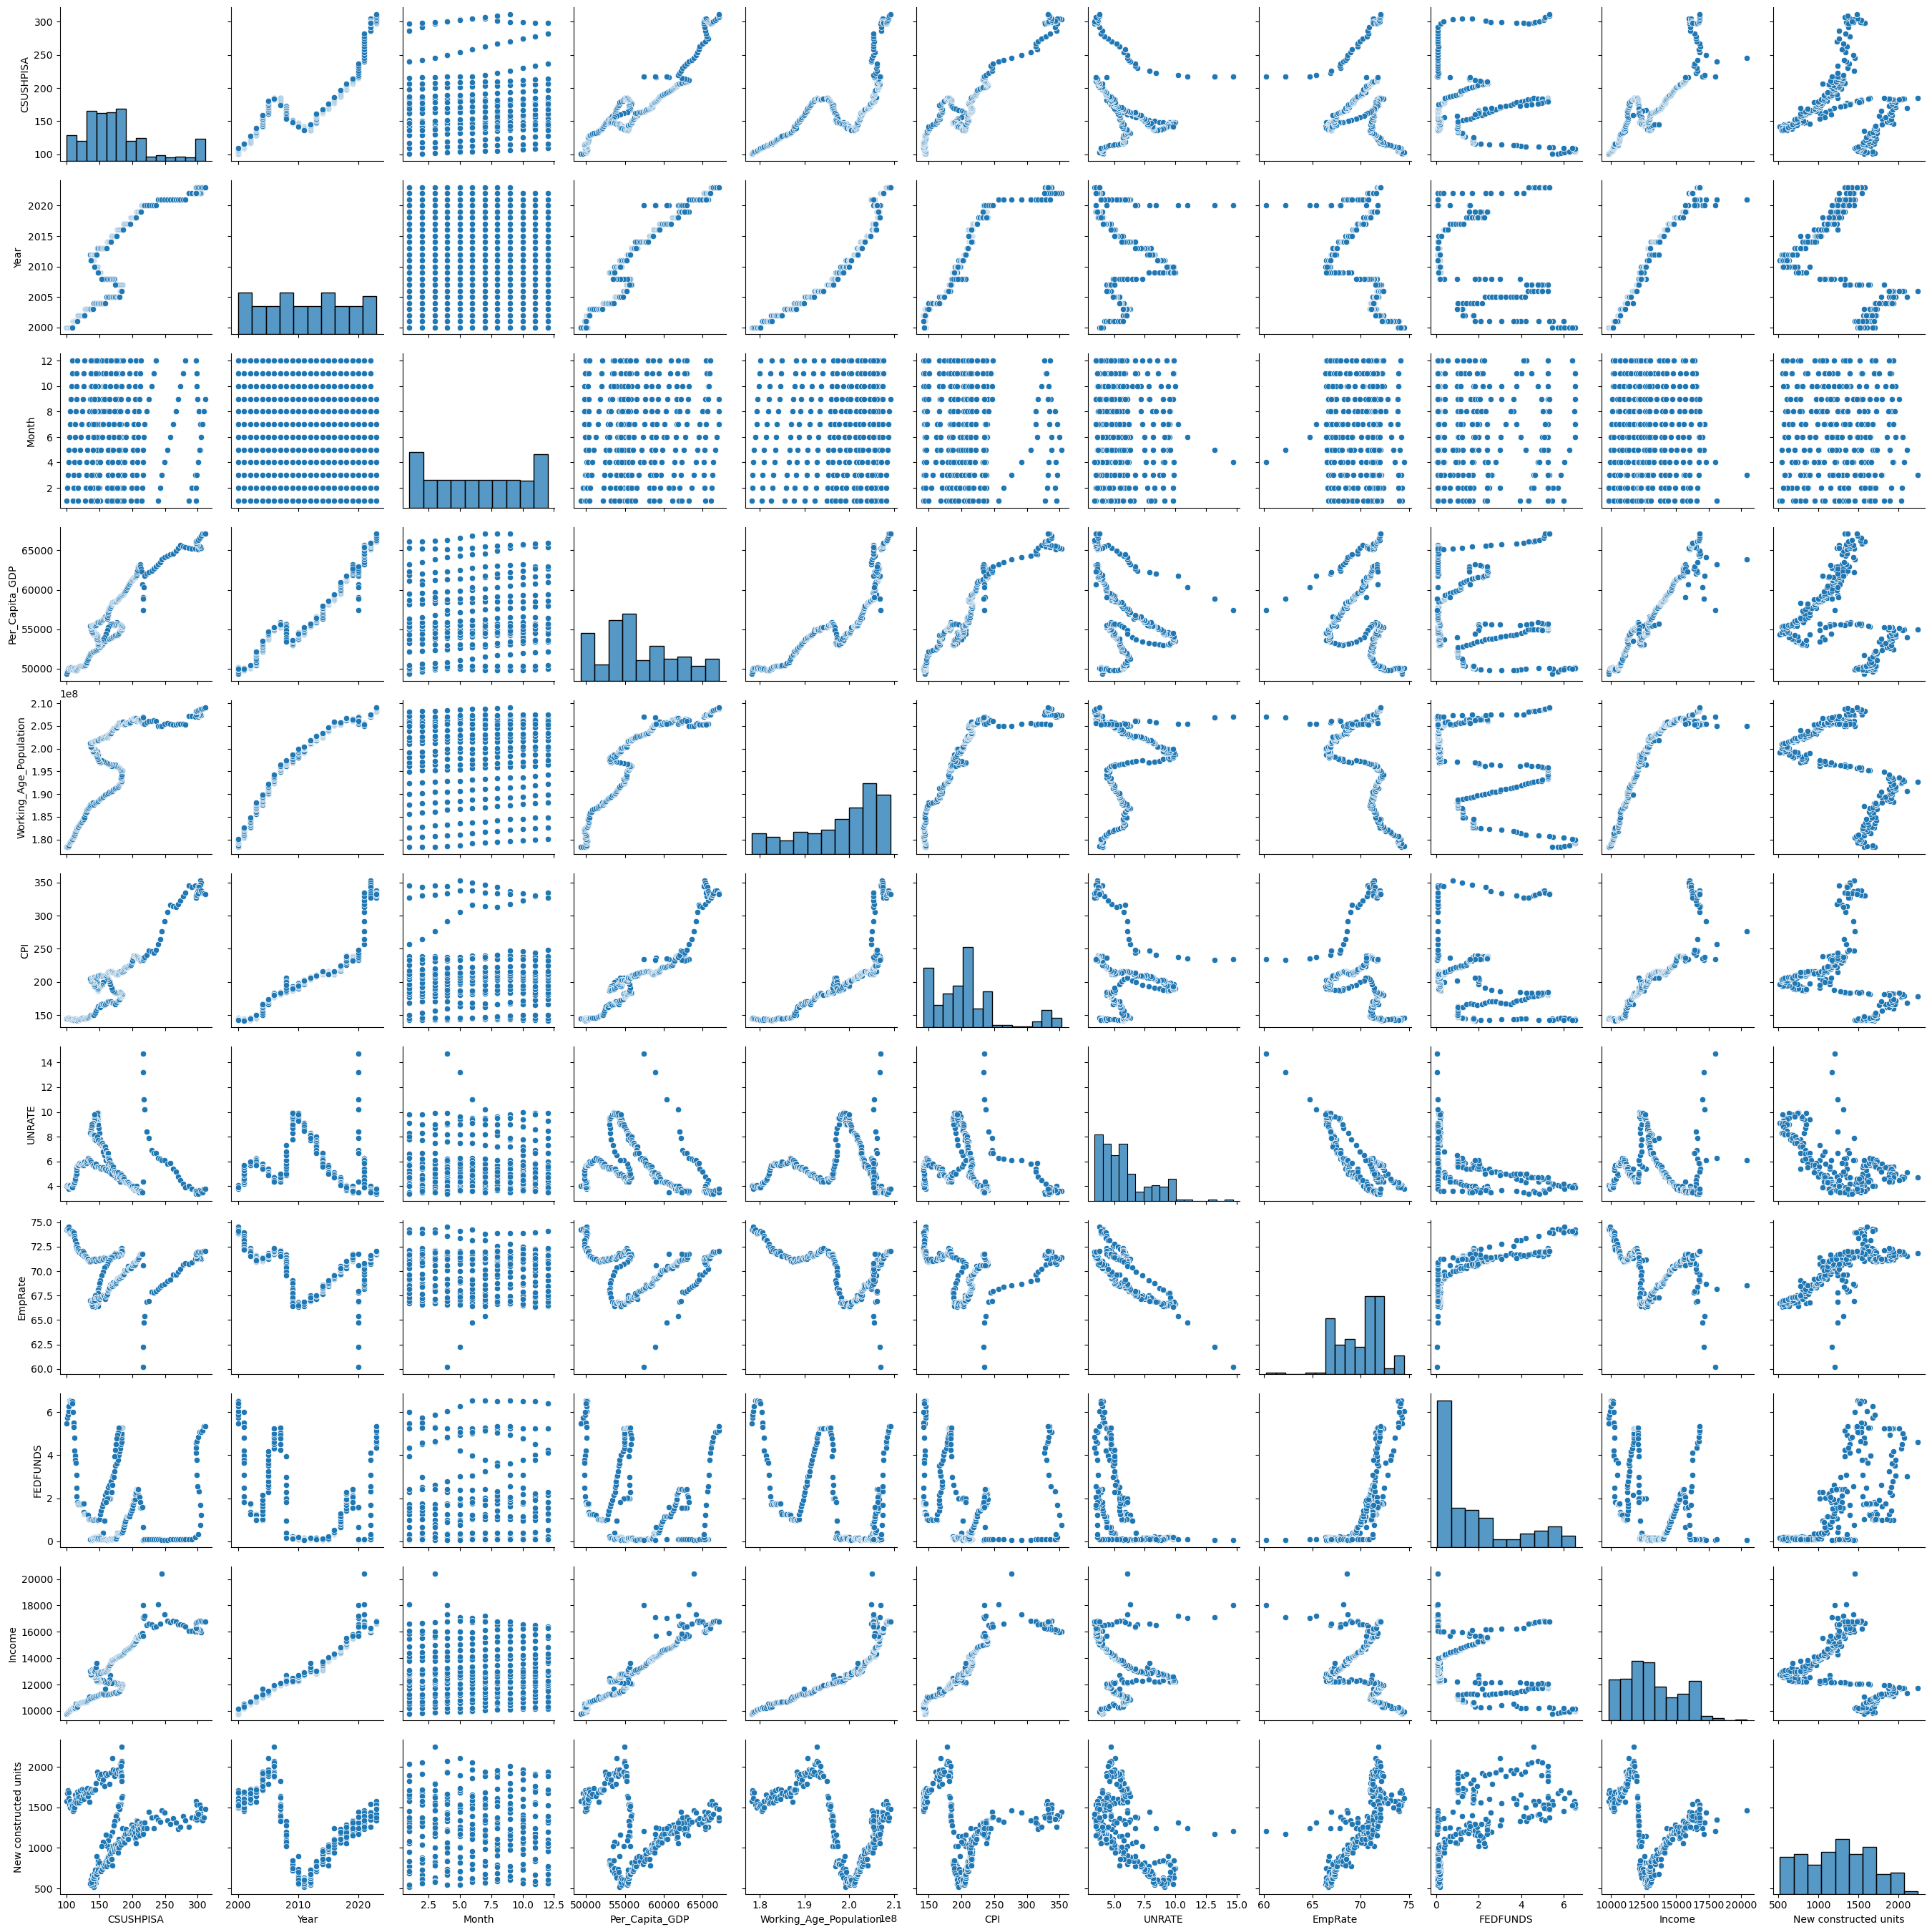

In [281]:
sns.pairplot(house_price_df)


##### Removing "Month" column since they won't be relevant in model development

In [286]:
house_price_df.drop(columns=["Month"], inplace = True)

In [287]:
house_price_df

CSUSHPISA    Year  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                    
2000-01-01    100.551  2000.0    49335.000000            1.782921e+08   
2000-02-01    101.339  2000.0    49593.000000            1.783433e+08   
2000-03-01    102.127  2000.0    49851.000000            1.784055e+08   
2000-04-01    102.922  2000.0    50109.000000            1.785807e+08   
2000-05-01    103.678  2000.0    50080.666667            1.787272e+08   
...               ...     ...             ...                     ...   
2023-05-01    302.566  2023.0    66588.333333            2.086128e+08   
2023-06-01    304.593  2023.0    66835.666667            2.087069e+08   
2023-07-01    306.767  2023.0    67083.000000            2.087792e+08   
2023-08-01    309.155  2023.0    67083.000000            2.089066e+08   
2023-09-01    311.175  2023.0    67083.000000            2.091172e+08   

                CPI  UNRATE    EmpRate  FEDFUNDS   Income  \
DATE                                                        
2000-01-01  144.100     4.0  74.264657      5.45   9799.9   
2000-02-01  144.700     4.1  74.283062      5.73   9837.9   
2000-03-01  145.400     4.0  74.242355      5.85   9864.0   
2000-04-01  145.600     3.8  74.508811      6.02   9913.7   
2000-05-01  144.900     4.0  74.079356      6.27   9954.5   
...             ...     ...        ...       ...      ...   
2023-05-01  337.473     3.7  71.932981      5.06  16818.5   
2023-06-01  337.336     3.6  71.993242      5.08  16809.5   
2023-07-01  334.576     3.5  71.953523      5.12  16796.9   
2023-08-01  333.980     3.8  72.055470      5.33  16799.7   
2023-09-01  332.224     3.8  72.054079      5.33  16804.8   

            New constructed units  
DATE                               
2000-01-01                 1574.0  
2000-02-01                 1677.0  
2000-03-01                 1704.0  
2000-04-01                 1610.0  
2000-05-01                 1682.0  
...                           ...  
2023-05-01                 1534.0  
2023-06-01                 1492.0  
2023-07-01                 1334.0  
2023-08-01                 1370.0  
2023-09-01                 1478.0  

[285 rows x 10 columns]

In [288]:
factors = ['CSUSHPISA','Per_Capita_GDP', 'Working_Age_Population',
       'CPI', 'UNRATE', 'EmpRate', 'FEDFUNDS','Income','New constructed units']

#### Histogram and Kernel Density Plot

<Figure size 1300x800 with 0 Axes>

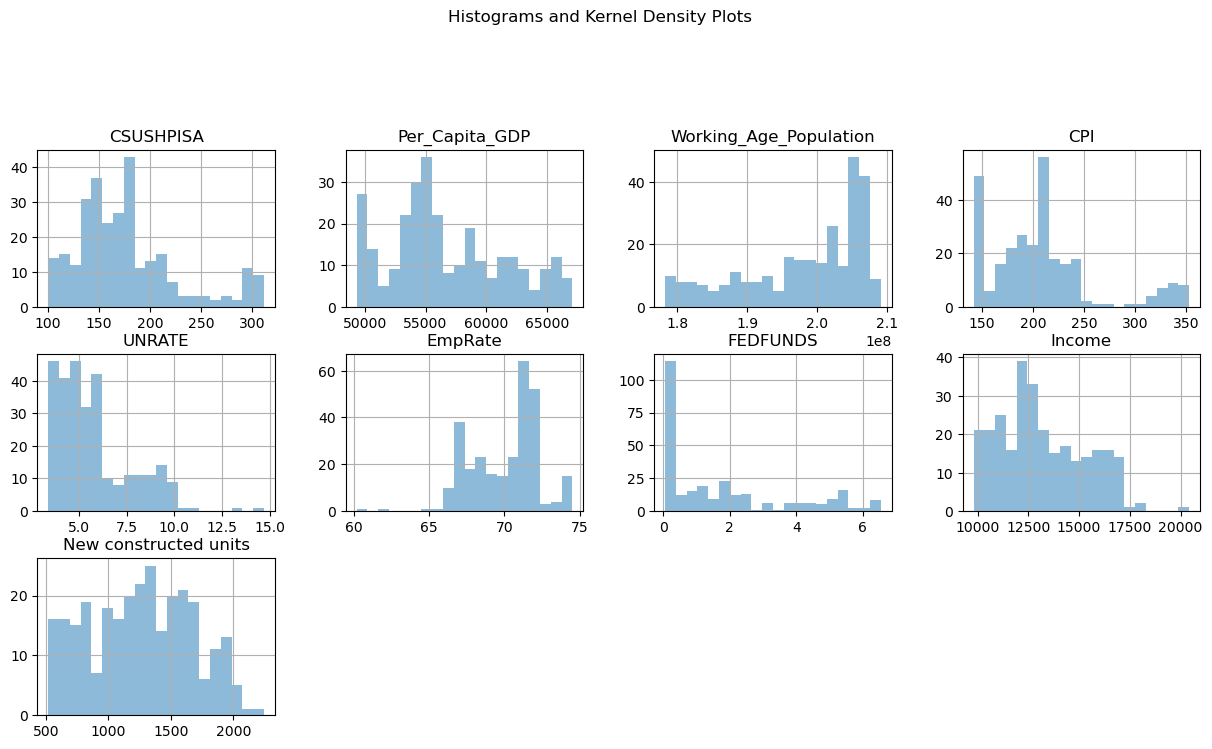

In [289]:
plt.figure(figsize=(13, 8))
house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

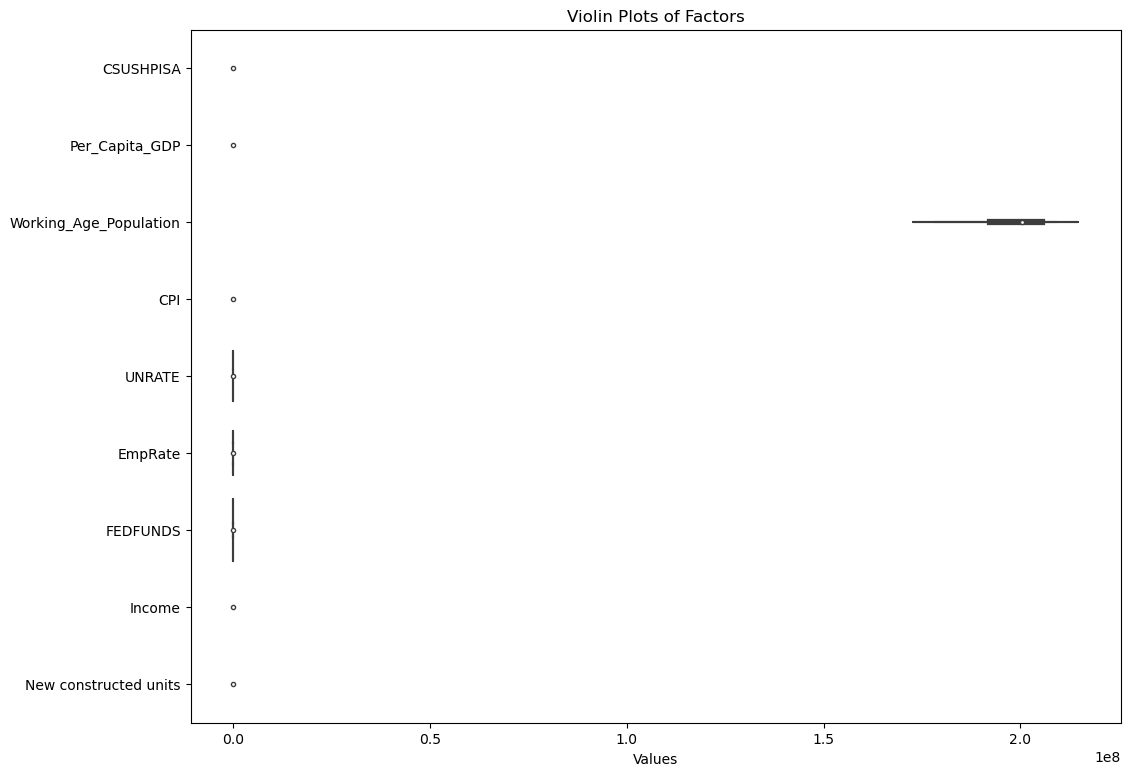

In [290]:
# Violin Plots
plt.figure(figsize=(12,9))
sns.violinplot(data=house_price_df[factors],orient="h")
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

In [291]:
house_price_df

CSUSHPISA    Year  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                    
2000-01-01    100.551  2000.0    49335.000000            1.782921e+08   
2000-02-01    101.339  2000.0    49593.000000            1.783433e+08   
2000-03-01    102.127  2000.0    49851.000000            1.784055e+08   
2000-04-01    102.922  2000.0    50109.000000            1.785807e+08   
2000-05-01    103.678  2000.0    50080.666667            1.787272e+08   
...               ...     ...             ...                     ...   
2023-05-01    302.566  2023.0    66588.333333            2.086128e+08   
2023-06-01    304.593  2023.0    66835.666667            2.087069e+08   
2023-07-01    306.767  2023.0    67083.000000            2.087792e+08   
2023-08-01    309.155  2023.0    67083.000000            2.089066e+08   
2023-09-01    311.175  2023.0    67083.000000            2.091172e+08   

                CPI  UNRATE    EmpRate  FEDFUNDS   Income  \
DATE                                                        
2000-01-01  144.100     4.0  74.264657      5.45   9799.9   
2000-02-01  144.700     4.1  74.283062      5.73   9837.9   
2000-03-01  145.400     4.0  74.242355      5.85   9864.0   
2000-04-01  145.600     3.8  74.508811      6.02   9913.7   
2000-05-01  144.900     4.0  74.079356      6.27   9954.5   
...             ...     ...        ...       ...      ...   
2023-05-01  337.473     3.7  71.932981      5.06  16818.5   
2023-06-01  337.336     3.6  71.993242      5.08  16809.5   
2023-07-01  334.576     3.5  71.953523      5.12  16796.9   
2023-08-01  333.980     3.8  72.055470      5.33  16799.7   
2023-09-01  332.224     3.8  72.054079      5.33  16804.8   

            New constructed units  
DATE                               
2000-01-01                 1574.0  
2000-02-01                 1677.0  
2000-03-01                 1704.0  
2000-04-01                 1610.0  
2000-05-01                 1682.0  
...                           ...  
2023-05-01                 1534.0  
2023-06-01                 1492.0  
2023-07-01                 1334.0  
2023-08-01                 1370.0  
2023-09-01                 1478.0  

[285 rows x 10 columns]

In [292]:
# Separating the target variable and the independent variable

X=house_price_df[["Year","Per_Capita_GDP","Working_Age_Population","CPI","UNRATE","EmpRate","FEDFUNDS","Income","New constructed units"]]
Y=house_price_df[["CSUSHPISA"]]

### Plotting scatter plots of the CASE-SHILLER index vs features

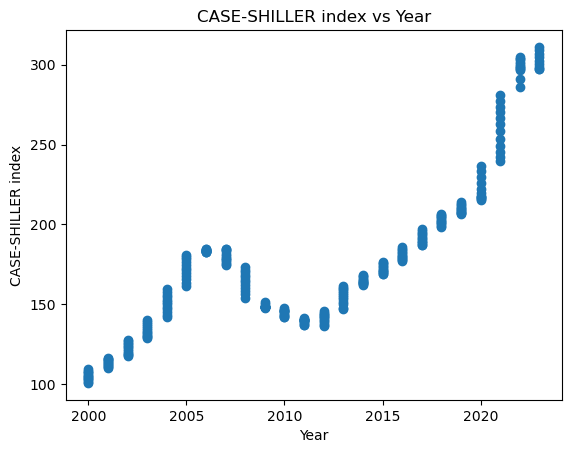

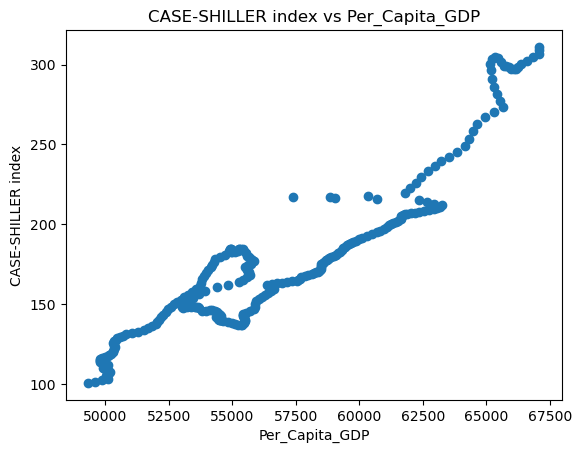

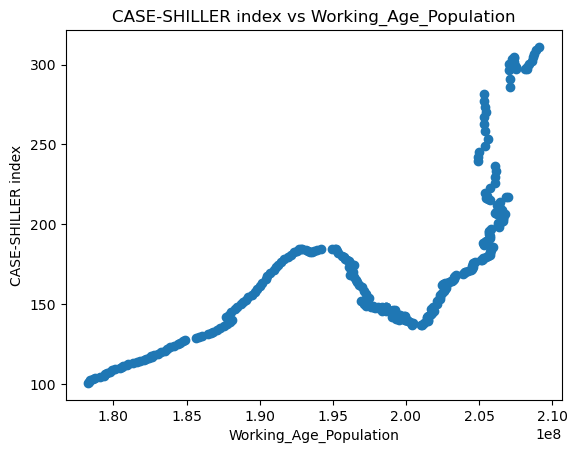

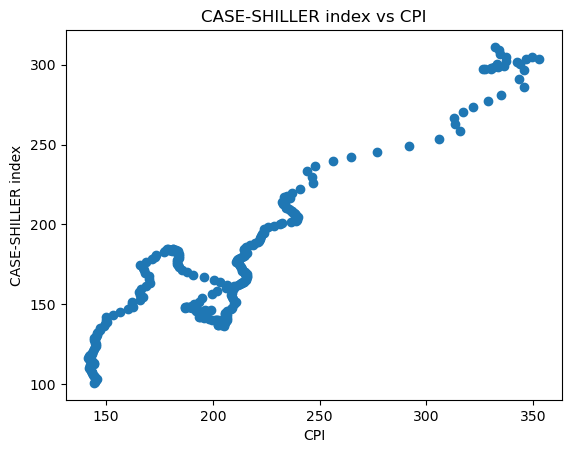

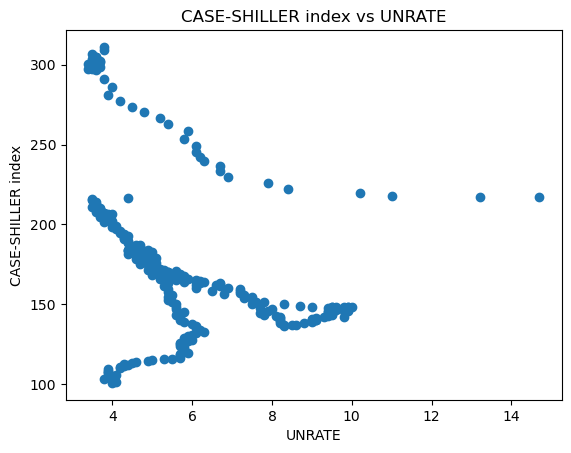

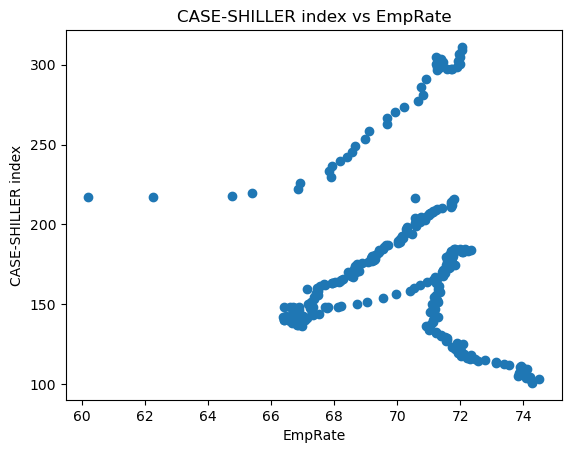

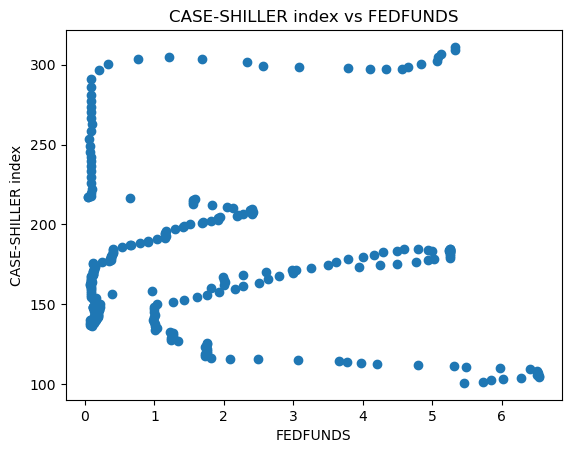

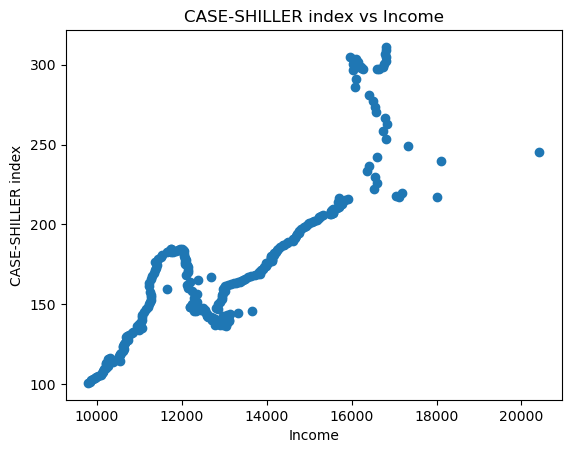

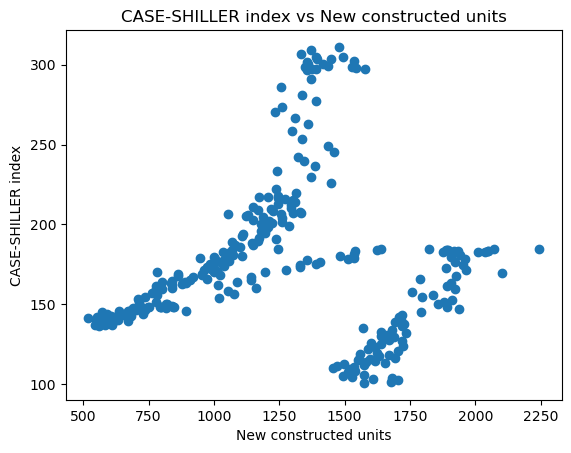

In [293]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y =Y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

##### Effects of Unemployment on US Home Price

##### Effects of GDP on US Home Price

##### Effect of the Federal Funds on US Home Prices:

##### Effect of Employement Rate on US Home Prices

##### Effect of Construction Price Index on US Home Price

##### Effect of Income on US Home Price

##### Effect of New Constructed Units on US Home Price

# Model Development

In [298]:
#Splitting data into Training and Testing Data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

from sklearn.preprocessing import StandardScaler

In [299]:
house_price_df

CSUSHPISA    Year  Per_Capita_GDP  Working_Age_Population  \
DATE                                                                    
2000-01-01    100.551  2000.0    49335.000000            1.782921e+08   
2000-02-01    101.339  2000.0    49593.000000            1.783433e+08   
2000-03-01    102.127  2000.0    49851.000000            1.784055e+08   
2000-04-01    102.922  2000.0    50109.000000            1.785807e+08   
2000-05-01    103.678  2000.0    50080.666667            1.787272e+08   
...               ...     ...             ...                     ...   
2023-05-01    302.566  2023.0    66588.333333            2.086128e+08   
2023-06-01    304.593  2023.0    66835.666667            2.087069e+08   
2023-07-01    306.767  2023.0    67083.000000            2.087792e+08   
2023-08-01    309.155  2023.0    67083.000000            2.089066e+08   
2023-09-01    311.175  2023.0    67083.000000            2.091172e+08   

                CPI  UNRATE    EmpRate  FEDFUNDS   Income  \
DATE                                                        
2000-01-01  144.100     4.0  74.264657      5.45   9799.9   
2000-02-01  144.700     4.1  74.283062      5.73   9837.9   
2000-03-01  145.400     4.0  74.242355      5.85   9864.0   
2000-04-01  145.600     3.8  74.508811      6.02   9913.7   
2000-05-01  144.900     4.0  74.079356      6.27   9954.5   
...             ...     ...        ...       ...      ...   
2023-05-01  337.473     3.7  71.932981      5.06  16818.5   
2023-06-01  337.336     3.6  71.993242      5.08  16809.5   
2023-07-01  334.576     3.5  71.953523      5.12  16796.9   
2023-08-01  333.980     3.8  72.055470      5.33  16799.7   
2023-09-01  332.224     3.8  72.054079      5.33  16804.8   

            New constructed units  
DATE                               
2000-01-01                 1574.0  
2000-02-01                 1677.0  
2000-03-01                 1704.0  
2000-04-01                 1610.0  
2000-05-01                 1682.0  
...                           ...  
2023-05-01                 1534.0  
2023-06-01                 1492.0  
2023-07-01                 1334.0  
2023-08-01                 1370.0  
2023-09-01                 1478.0  

[285 rows x 10 columns]

In [300]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [301]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [302]:
lr=LinearRegression()

dt=DecisionTreeRegressor()

rf=RandomForestRegressor()

kn=KNeighborsRegressor(n_neighbors=3)

sv=SVR()

gb=GradientBoostingRegressor()

x=XGBRegressor()

ab=AdaBoostRegressor()

lst=[lr,dt,rf,kn,sv,gb,x,ab]

In [307]:
model=[]
r2_score_train=[]
r2_score_test=[]
rmse_test=[]
random_state=[]

for i1 in lst:
    for i2 in range(0,5):
        x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=i2,test_size=0.20)
        i1.fit(x_train,np.ravel(y_train,order='C'))
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)
        model.append(i1)
        r2_score_test.append(round(r2_score(y_test,pred_test),2))
        r2_score_train.append(round(r2_score(y_train,pred_train),2))
        rmse_test.append(round(np.sqrt(mean_squared_error(y_test,pred_test)),2))
        random_state.append(i2)
#Creating Dataframe of comparison between different models and their respective scores

modeldata=pd.DataFrame({"Model":model,"Random State":random_state,"R2 score-train":r2_score_train,"R2 score-test":r2_score_test,"RMSE":rmse_test})
modeldata     

Model  Random State  \
0                                  LinearRegression()             0   
1                                  LinearRegression()             1   
2                                  LinearRegression()             2   
3                                  LinearRegression()             3   
4                                  LinearRegression()             4   
5                             DecisionTreeRegressor()             0   
6                             DecisionTreeRegressor()             1   
7                             DecisionTreeRegressor()             2   
8                             DecisionTreeRegressor()             3   
9                             DecisionTreeRegressor()             4   
10  (DecisionTreeRegressor(max_features=1.0, rando...             0   
11  (DecisionTreeRegressor(max_features=1.0, rando...             1   
12  (DecisionTreeRegressor(max_features=1.0, rando...             2   
13  (DecisionTreeRegressor(max_features=1.0, rando...             3   
14  (DecisionTreeRegressor(max_features=1.0, rando...             4   
15                 KNeighborsRegressor(n_neighbors=3)             0   
16                 KNeighborsRegressor(n_neighbors=3)             1   
17                 KNeighborsRegressor(n_neighbors=3)             2   
18                 KNeighborsRegressor(n_neighbors=3)             3   
19                 KNeighborsRegressor(n_neighbors=3)             4   
20                                              SVR()             0   
21                                              SVR()             1   
22                                              SVR()             2   
23                                              SVR()             3   
24                                              SVR()             4   
25  ([DecisionTreeRegressor(criterion='friedman_ms...             0   
26  ([DecisionTreeRegressor(criterion='friedman_ms...             1   
27  ([DecisionTreeRegressor(criterion='friedman_ms...             2   
28  ([DecisionTreeRegressor(criterion='friedman_ms...             3   
29  ([DecisionTreeRegressor(criterion='friedman_ms...             4   
30  XGBRegressor(base_score=0.5, booster='gbtree',...             0   
31  XGBRegressor(base_score=0.5, booster='gbtree',...             1   
32  XGBRegressor(base_score=0.5, booster='gbtree',...             2   
33  XGBRegressor(base_score=0.5, booster='gbtree',...             3   
34  XGBRegressor(base_score=0.5, booster='gbtree',...             4   
35  (DecisionTreeRegressor(max_depth=3, random_sta...             0   
36  (DecisionTreeRegressor(max_depth=3, random_sta...             1   
37  (DecisionTreeRegressor(max_depth=3, random_sta...             2   
38  (DecisionTreeRegressor(max_depth=3, random_sta...             3   
39  (DecisionTreeRegressor(max_depth=3, random_sta...             4   

    R2 score-train  R2 score-test   RMSE  
0             0.99           0.99   5.49  
1             0.99           0.99   5.38  
2             0.99           0.99   5.91  
3             0.99           0.98   5.60  
4             0.99           0.99   4.97  
5             1.00           1.00   3.07  
6             1.00           1.00   1.94  
7             1.00           1.00   2.28  
8             1.00           1.00   2.81  
9             1.00           1.00   2.92  
10            1.00           1.00   2.16  
11            1.00           1.00   1.42  
12            1.00           1.00   1.67  
13            1.00           1.00   1.67  
14            1.00           1.00   1.27  
15            0.96           0.92  15.24  
16            0.97           0.93  11.49  
17            0.95           0.98   6.60  
18            0.96           0.88  14.35  
19            0.98           0.89  15.65  
20           -0.02          -0.11  55.96  
21           -0.01           0.02  43.83  
22           -0.01          -0.02  52.22  
23           -0.02           0.01  41.43  
24           -0.01           0.02  47.91  
25            1.00

#### Checking Cross Validation Score for the obtained model

In [308]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=4,test_size=0.20)

In [310]:
model=RandomForestRegressor()
model.fit(x_train,np.ravel(y_train,order='C'))
predtest=model.predict(x_test)
predtrain=model.predict(x_train)


In [311]:
print(round(r2_score(y_test,predtest),2))
print(round(r2_score(y_train,predtrain),2))
print(round(np.sqrt(mean_squared_error(y_test,predtest)),2))

1.0
1.0
1.45


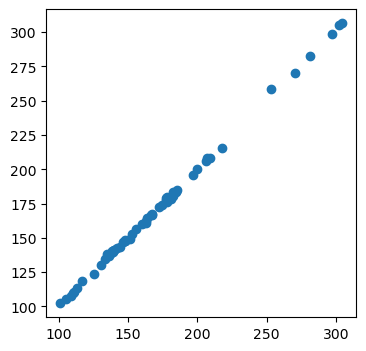

In [312]:
plt.figure(figsize=(4,4))
plt.scatter(x=y_test,y=predtest)

In [314]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(model,X,np.ravel(Y,order='C'),cv=cv)
score1=cv1.mean()
score1

0.9981363488568571

# Hyperparameter Tuning

In [315]:
from sklearn.model_selection import RandomizedSearchCV

In [316]:
rf=RandomForestRegressor()

In [317]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [318]:
param_dist={"criterion": ["squared_error","absolute_error","friedman_mse","poisson"],'n_estimators':[10,20,30]}

In [324]:
samples=5  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=3)

In [325]:
final=randomCV.fit(x_train,np.ravel(y_train,order='C'))

In [326]:
final.best_params_

{'n_estimators': 20, 'criterion': 'poisson'}

In [327]:
pred1=final.predict(x_test)
pred2=final.predict(x_train)

In [328]:
print(round(r2_score(y_test,pred1),2))
print(round(r2_score(y_train,pred2),2))
print(round(np.sqrt(mean_squared_error(y_test,pred1)),2))

1.0
1.0
1.36


##### After successful tuning the model, Root Mean Square Error has been reduced from 1.45 to 1.36

# Saving Model

In [329]:
import pickle
pickle.dump(final, open('US_House_Price.pkl', 'wb'))

# Predicting the House Price Index for years- 2024 and 2025 with sample values

In [330]:
array = np.array([[2024,6000,1.976041e+08,200,5,65,1,15000,1500],  
                  [2025,6500,2.071042e+08,360,8,30,0.02,14000,1650]]) 

In [335]:
# creating a list of column names 
column_values = ['Year','Per_Capita_GDP','Working_Age_Population','CPI','UNRATE','EmpRate','FEDFUNDS','Income','New constructed units']

In [336]:
# creating the dataframe 
df_test=pd.DataFrame(data = array,columns = column_values)

In [337]:
df_test

Year  Per_Capita_GDP  Working_Age_Population    CPI  UNRATE  EmpRate  \
0  2024.0          6000.0             197604100.0  200.0     5.0     65.0   
1  2025.0          6500.0             207104200.0  360.0     8.0     30.0   

   FEDFUNDS   Income  New constructed units  
0      1.00  15000.0                 1500.0  
1      0.02  14000.0                 1650.0

In [338]:
pred_sample=final.predict(df_test)

In [339]:
pred_sample

array([189.50585, 185.13975])